In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

In [2]:
#define position of file on google drive
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/health_proj/'

Mounted at /content/drive


In [3]:
#read csv file 
data = pd.read_csv("/content/drive/MyDrive/health_proj/health_cancer_dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data['age'] = data['age'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [6]:
# preview the first 5 patient characteristics  
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Preview the information of last 5 patient characteristics
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57.0,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#Check the name of all columns available in dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#  frame's summary statistics for sample data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.shape

(303, 14)

In [11]:
# detect missing & null values
data.isna().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no missing data found in rows 

In [12]:
# detect missing & null values
data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no null values detected 

In [13]:
#find and remove duplicates accross rows
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

The result is a boolean Series with the value False denoting no duplicate. In other words, the value False means the entry is identical to a previous one. True would be otherwise.

In [14]:
#find duplicates accross columns 
data.duplicated(subset=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

no duplicates found accross columns.
if duplicates found remove by:
1.Count duplicate on a column
>>> data.Column_name.duplicated().sum()
2Count duplicate in a DataFrame
>>> data.duplicated().sum()
3.Count duplicate on certain columns
>>> data.duplicated(subset=['']).sum()
4.Count the number of non-duplicates
>>> (data.duplicated()).sum()
5.

In [15]:
#dummy variable for 'thal' column 
# creating a copy of the original data frame
data2 = data.copy()

In [16]:
data2 = pd.get_dummies(data2,
                     columns = ['thal'])


In [17]:
display(data2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_0,thal_1,thal_2,thal_3
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,1,0,0,1,0
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,1,0,0,1,0
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,0,0,0,0,1
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,0,0,0,0,1
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,0,0,0,0,1
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,0,0,0,0,1


3 dummy variables thal1,...thal3 created to replace 'thal'

In [18]:
data2.shape


(303, 17)

**Exploratory Data Analysis**


In [60]:
#count data values
data2['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

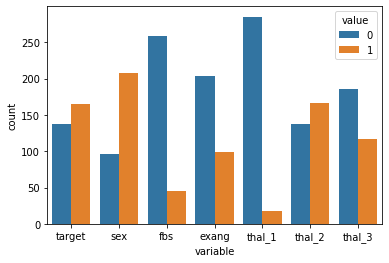

In [19]:
data_categorical = data2.loc[:,['target','sex','fbs', 'exang', 'thal_1', 'thal_2','thal_3']]
sns.countplot(x="variable", hue="value",data= pd.melt(data_categorical));

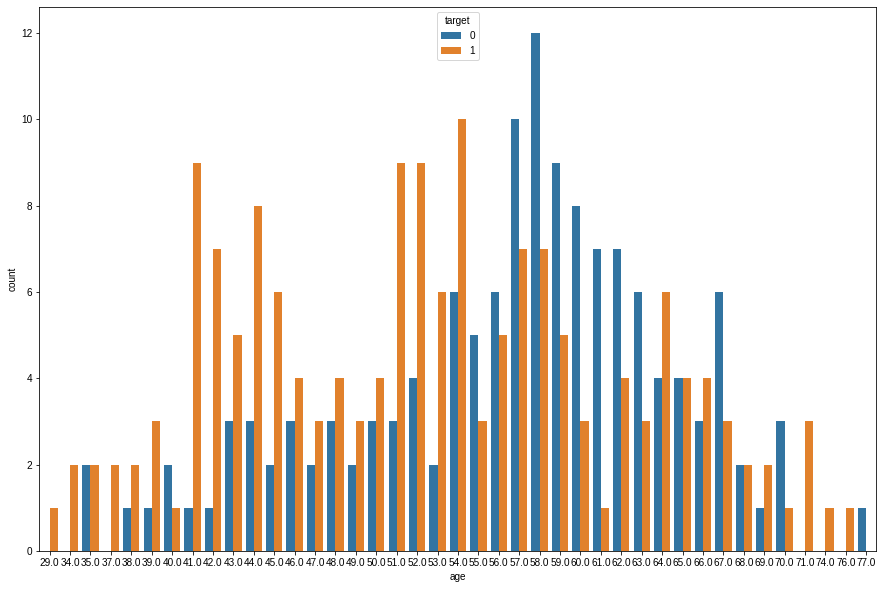

In [20]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
sns.countplot(x='age', hue='target', data = data2)
plt.style.use('seaborn-whitegrid')

In [21]:
#Custom function to determine the chances of 'target' ie CVD
def target_INSERTION(cols):
  target=cols[0]
  if pd.isnull(target):
    return 'False'
  else:
    return target

In [22]:
#check if 'target' function worked -apply to determine chances of CVD
data['target']=data2[['target']].apply(target_INSERTION,axis=1)

In [23]:
data[pd.isnull(data2['target'])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Text(0.5, 1.0, 'CVD occurence Vs age')

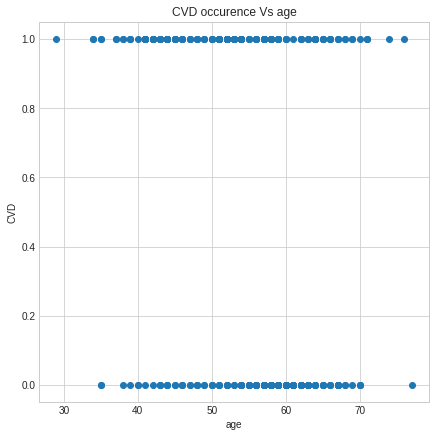

In [24]:
#First explore data for CVD occurence and Age
plt.figure(figsize=(7,7))
plt.scatter(x='age',y= 'target',data=data2)
plt.xlabel('age')
plt.ylabel('CVD')
plt.title('CVD occurence Vs age')

consider computing biserial correlation

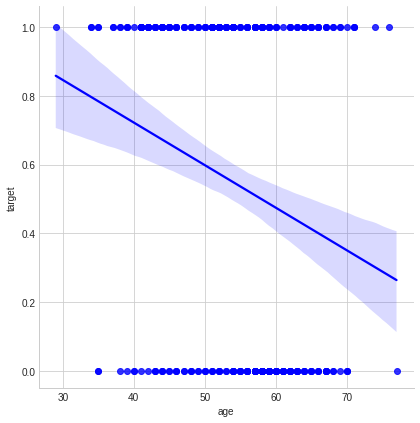

In [25]:
df = data
g1 = sns.PairGrid(df, y_vars=["target"], x_vars=["age"], height=6)
g1.map(sns.regplot, color="blue")

In [26]:
##cvd is shown to be negatively correlated with age meaning that prevalence decreases with age. This may mean two things- either the data is distorted or CVD claims its victims early in their 50s and 60s. hence beyond these years you may not be a victom of CVD.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


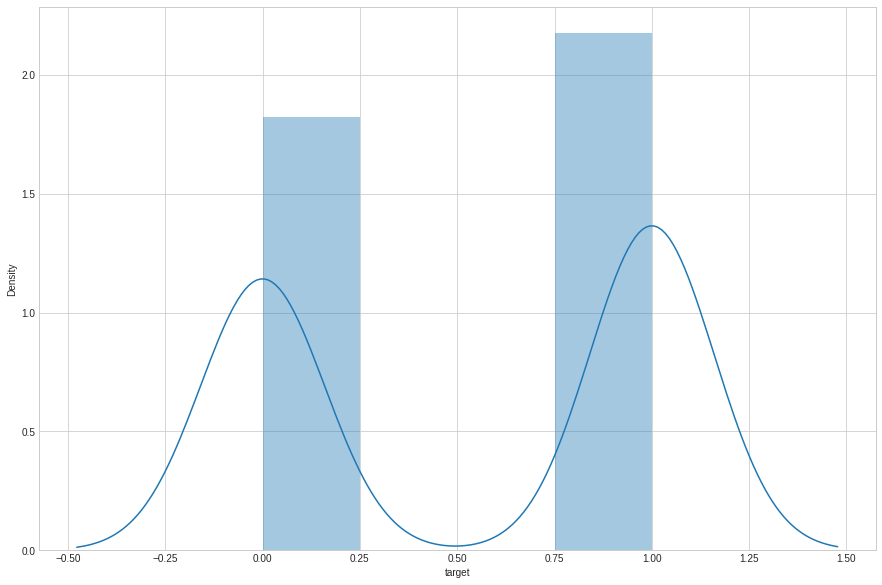

In [27]:
#Plotting Distribution Plot
sns.distplot(data['target'])

<Figure size 288x288 with 0 Axes>

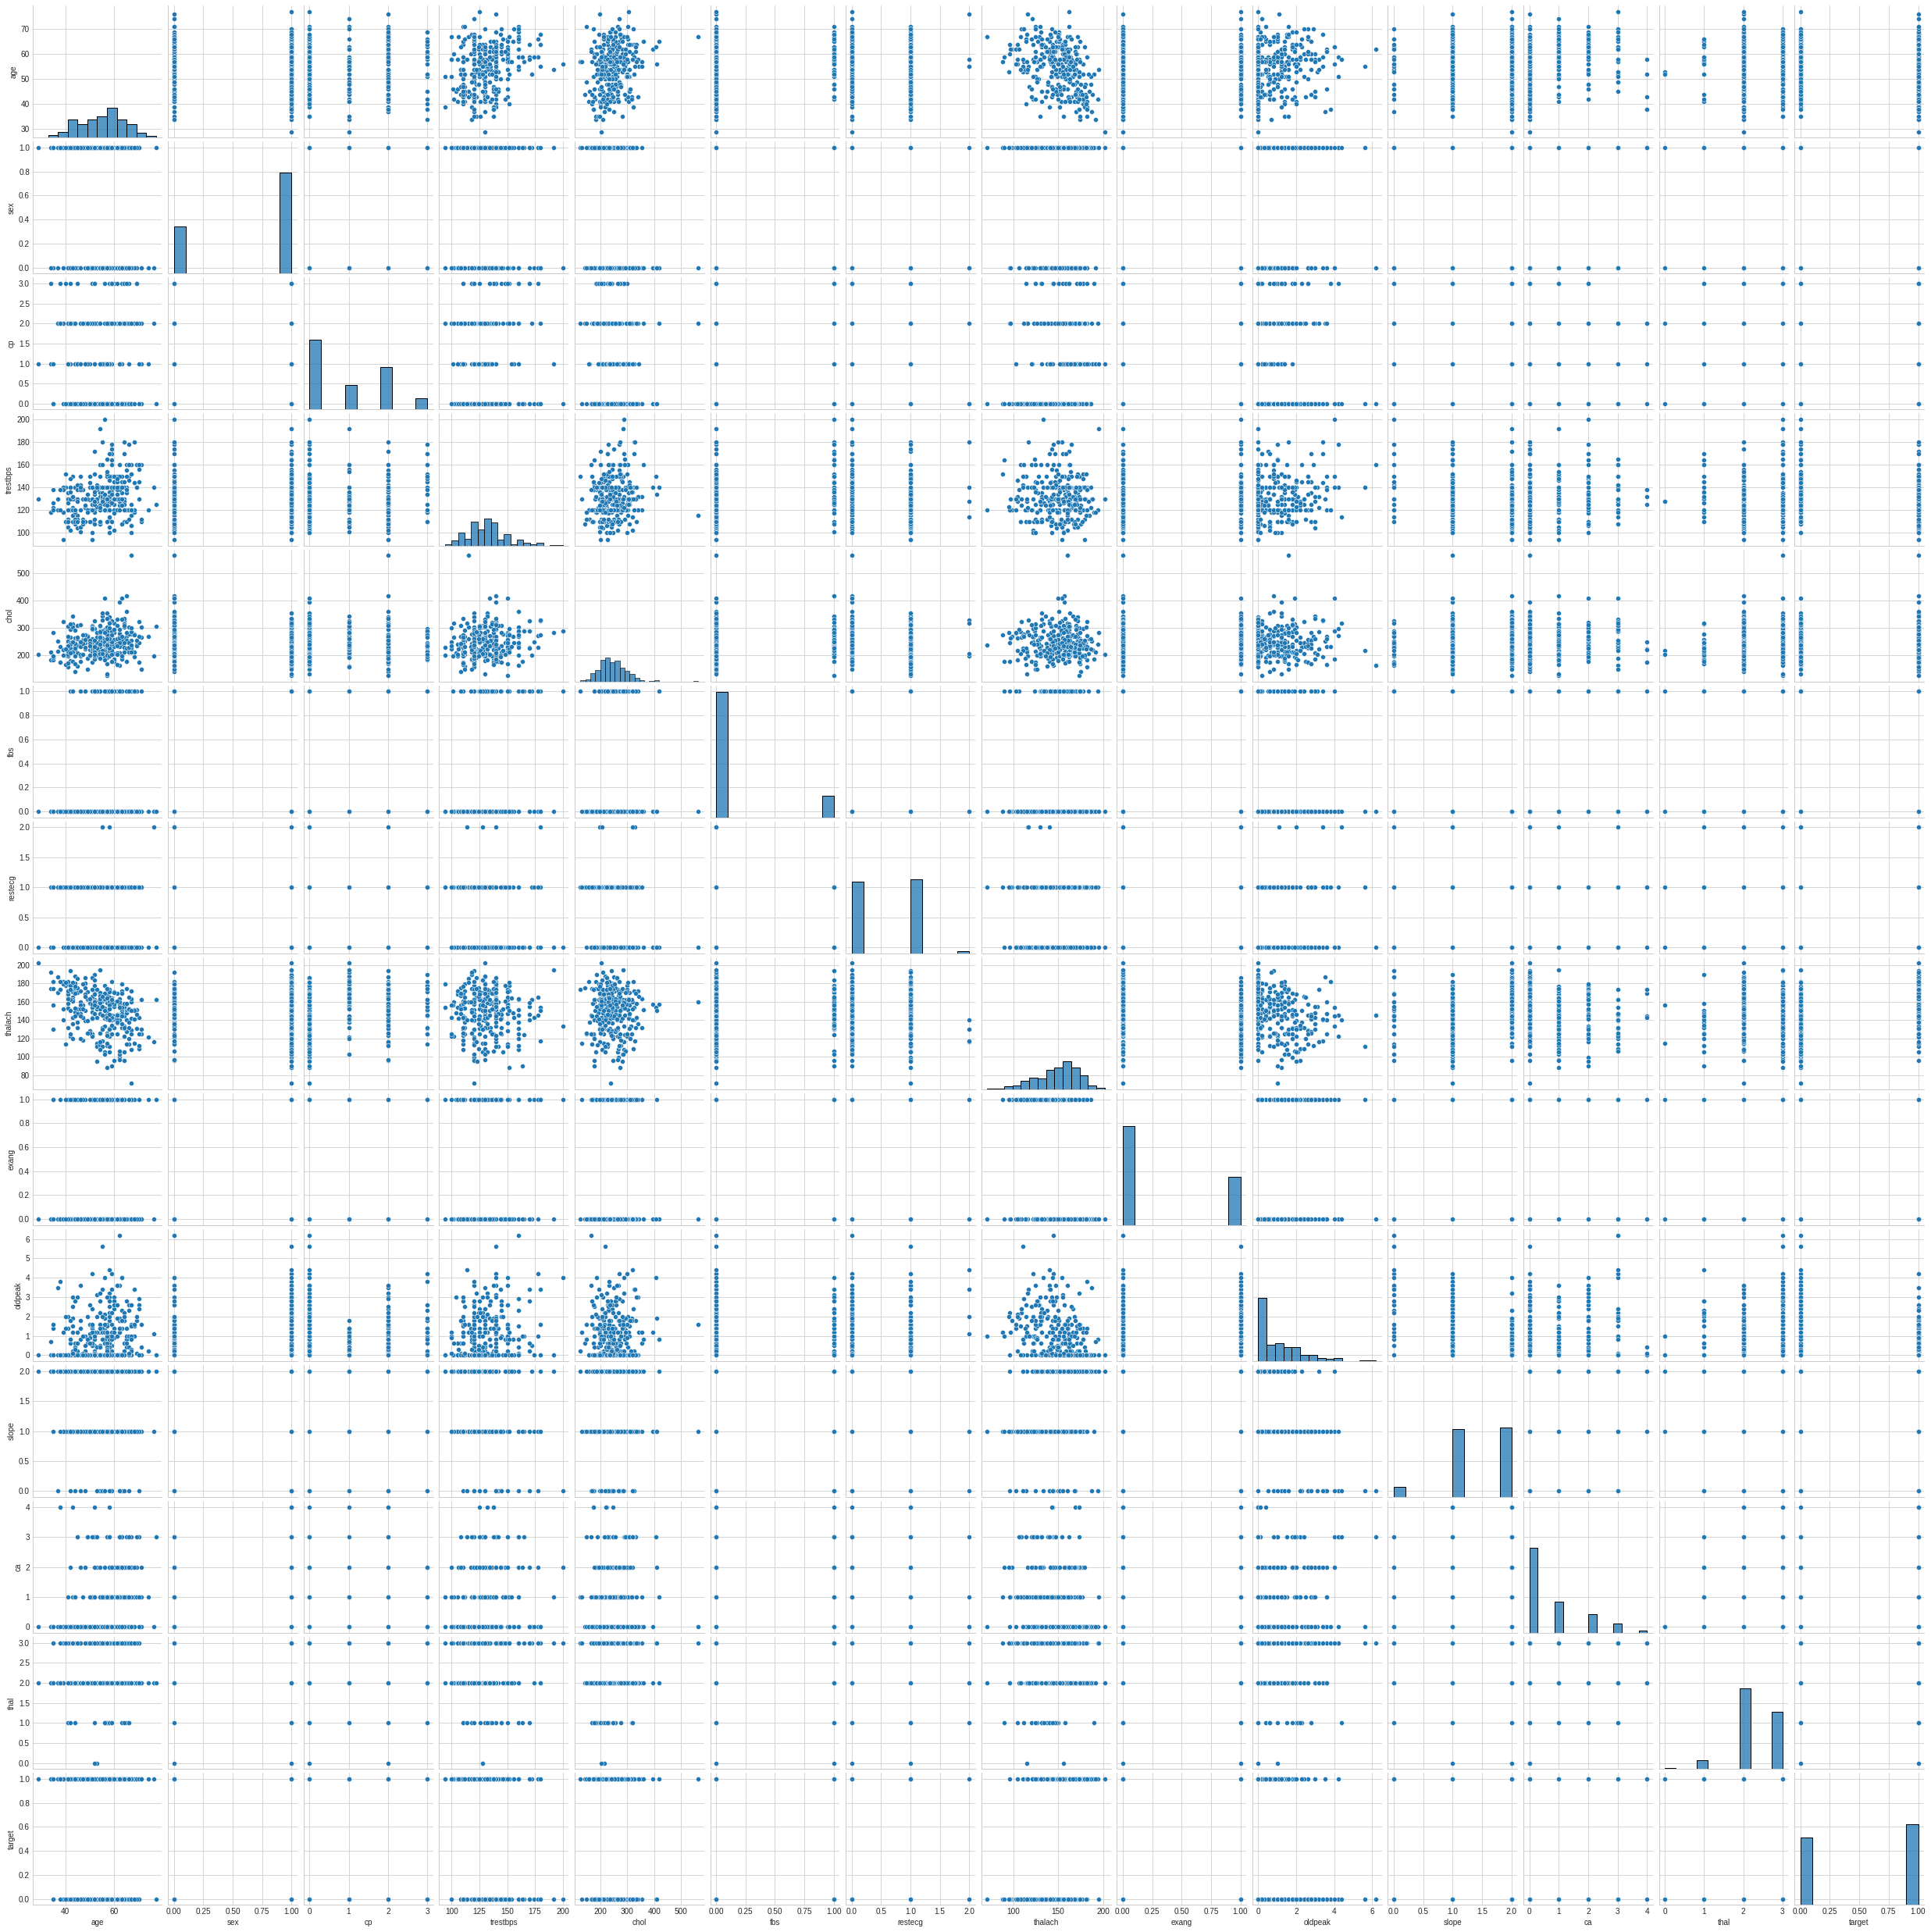

In [28]:
#Plotting pairplot
plt.figure(figsize=(4,4))
sns.pairplot(data=data)


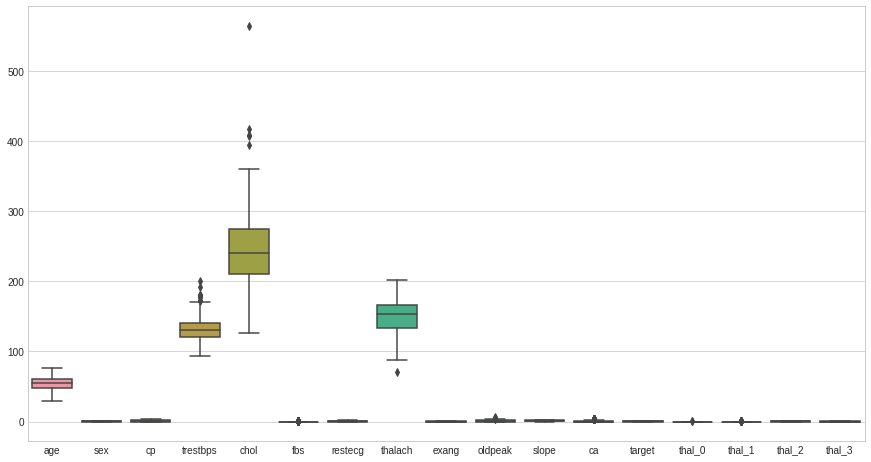

In [29]:
#Plotting boxplot
plt.figure(figsize=(15,8))
plt.grid('minor')
sns.boxplot(data=data2)


outliers present in 'trestbps', 'chol' & 'thalach'

In [30]:
#Find exact values of outlier in variables 'trestbps', 
Q1_trestbps = data2.trestbps.quantile(0.25)
Q3_trestbps = data2.trestbps.quantile(0.75)
Q1_trestbps,Q3_trestbps

(120.0, 140.0)

In [31]:
#compute IQR_trestbps
IQR_trestbps =Q3_trestbps-Q1_trestbps
IQR_trestbps

20.0

In [32]:
#compute quantile limits for trestbps
lower_limit_trestbps = Q1_trestbps - 1.5*IQR_trestbps
upper_limit_trestbps = Q3_trestbps  + 1.5*IQR_trestbps
lower_limit_trestbps, upper_limit_trestbps

(90.0, 170.0)

In [33]:
#drop outliers in trestbps
data3 = data2[(data2.trestbps<upper_limit_trestbps) & (data2.trestbps>lower_limit_trestbps)]
data3.shape

(290, 17)

In [34]:
#Find exact values of outlier in variables 'chol', 
Q1_chol = data2.chol.quantile(0.25)
Q3_chol = data2.chol.quantile(0.75)
Q1_chol,Q3_chol

(211.0, 274.5)

In [35]:
#compute IQR_chol
IQR_chol =Q3_chol-Q1_chol
IQR_chol

63.5

In [36]:
#compute quantile limits for chol
lower_limit_chol = Q1_chol - 1.5*IQR_chol
upper_limit_chol = Q3_chol  + 1.5*IQR_chol
lower_limit_chol, upper_limit_chol

(115.75, 369.75)

In [37]:
#drop outliers in chol
data4 = data3[(data3.chol<upper_limit_chol) & (data3.chol>lower_limit_chol)]
data4.shape

(285, 17)

In [38]:
#Find exact values of outlier in variables 'thalach', 
Q1_thalach = data2.thalach.quantile(0.25)
Q3_thalach = data2.thalach.quantile(0.75)
Q1_thalach,Q3_thalach

(133.5, 166.0)

In [39]:
#compute IQR_chol
IQR_thalach =Q3_thalach-Q1_thalach
IQR_thalach

32.5

In [40]:
#compute quantile limits for thalach
lower_limit_thalach = Q1_thalach - 1.5*IQR_thalach
upper_limit_thalach = Q3_thalach  + 1.5*IQR_thalach
lower_limit_thalach, upper_limit_thalach

(84.75, 214.75)

In [41]:
#drop outliers in thalach
data5 = data4[(data4.thalach<upper_limit_thalach) & (data4.thalach>lower_limit_thalach)]
data5.shape

(284, 17)

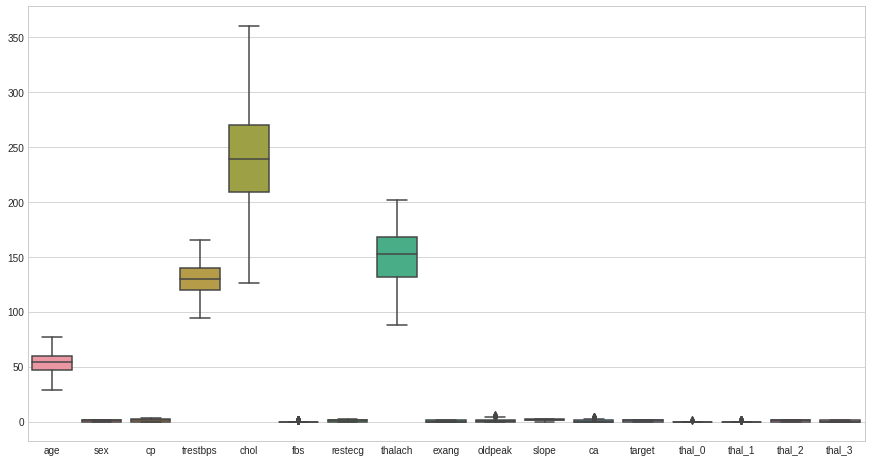

In [42]:
#Plotting boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=data5)

In [43]:
# save version of data without outliers
data5.to_csv ('health_CVD_cleaned.csv', index =False)

Text(0.5, 1.0, 'CVD occurence Vs sex')

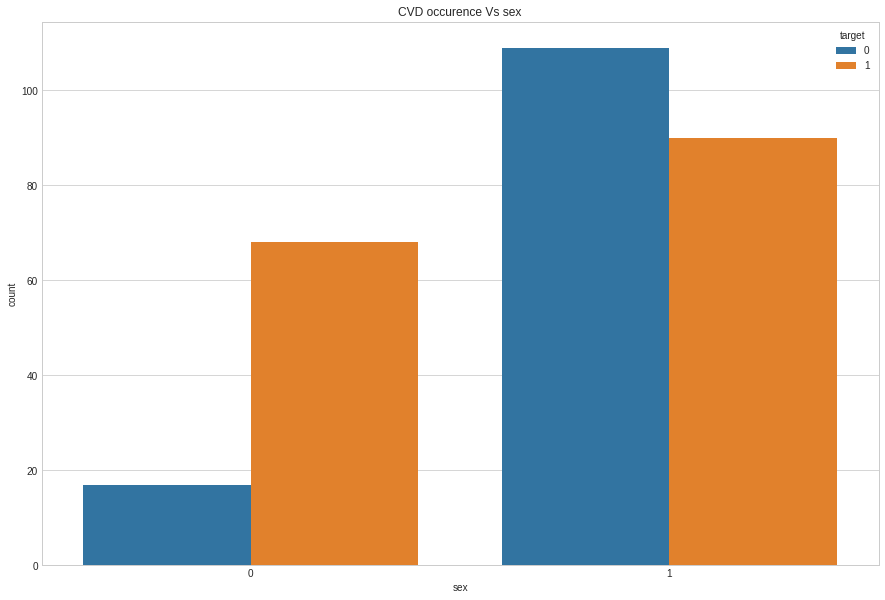

In [44]:
#CVD occurence accross gender 
rcParams['figure.figsize'] = 15, 10
sns.countplot(x='sex', hue='target', data = data5)
plt.style.use('seaborn-whitegrid')
plt.xlabel('sex')
plt.ylabel('count')
plt.title('CVD occurence Vs sex')

CVD is more prevalent among males 

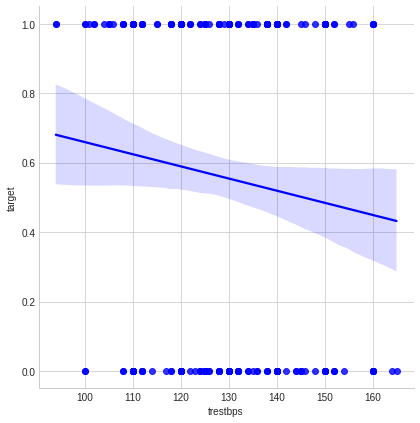

In [45]:
#CVD occurence and resting blood pressure
df = data5
g1 = sns.PairGrid(df, y_vars=["target"], x_vars=["trestbps"], height=6)
g1.map(sns.regplot, color="blue") 


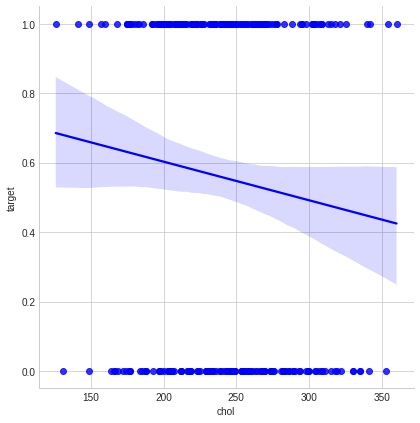

In [46]:
#CVD occurence and cholestral levels 
df = data5
g1 = sns.PairGrid(df, y_vars=["target"], x_vars=["chol"], height=6)
g1.map(sns.regplot, color="blue") 

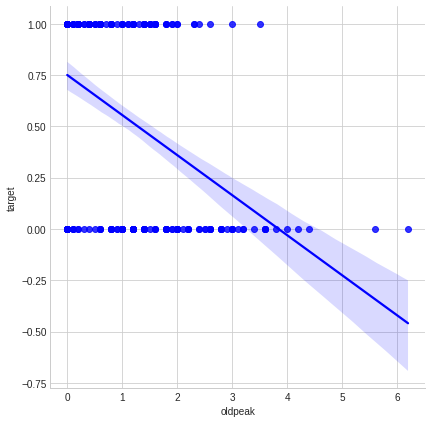

In [47]:
#CVD occurence and slope of the peak exercise 
df = data5
g1 = sns.PairGrid(df, y_vars=["target"], x_vars=["oldpeak"], height=6)
g1.map(sns.regplot, color="blue") 

Importing Logistic Regression Model

In [48]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [49]:
lr= LogisticRegression()

In [50]:
#Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split

In [51]:
from tables.tests.test_suite import test
X_train, X_test, y_train, y_test = train_test_split(data5[['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal_0','thal_1','thal_2','thal_3']],data5.target,train_size=0.8)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_0,thal_1,thal_2,thal_3
143,67.0,0,0,106,223,0,1,142,0,0.3,2,2,0,0,1,0
163,38.0,1,2,138,175,0,1,173,0,0.0,2,4,0,0,1,0
173,58.0,1,2,132,224,0,0,173,0,3.2,2,2,0,0,0,1
254,59.0,1,3,160,273,0,0,125,0,0.0,2,0,0,0,1,0
264,54.0,1,0,110,206,0,0,108,1,0.0,1,1,0,0,1,0
158,58.0,1,1,125,220,0,1,144,0,0.4,1,4,0,0,0,1
188,50.0,1,2,140,233,0,1,163,0,0.6,1,1,0,0,0,1
198,62.0,1,0,120,267,0,1,99,1,1.8,1,2,0,0,0,1
62,52.0,1,3,118,186,0,0,190,0,0.0,1,0,0,1,0,0
176,60.0,1,0,117,230,1,1,160,1,1.4,2,2,0,0,0,1


In [52]:
#Fit the model in train and test data
lr.fit(X_train,y_train).score(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8766519823788547

The accuracy score is 91%. It means the model is predicting fairly well.

In [53]:
#Importing the statsmodel library
import statsmodels.api as sm

In [54]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train)

In [55]:
model1 = model1.fit()


In [56]:
#Finding the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     17.62
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.35e-29
Time:                        19:43:17   Log-Likelihood:                -71.938
No. Observations:                 227   AIC:                             175.9
Df Residuals:                     211   BIC:                             230.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0009      0.003     -0.299      0.765      -0.007       0.005
sex           -0.1351      0.058     -2.337      0.020      -0.249      -0.021
cp             0.0986      0.026      3.778      0.000       0.047       0.150
trestbps   -3.699e-05      0.002     -0.022      0.982      -0.003       0.003
chol          -0.0009      0.001     -1.744      0.083      -0.002       0.000
fbs            0.0642      0.069      0.935      0.351      -0.071       0.200
restecg        0.0658      0.047      1.415      0.159      -0.026       0.157
thalach        0.0017      0.001      1.330      0.185      -0.001       0.004
exang         -0.0879      0.060     -1.457      0.147      -0.207       0.031
oldpeak       -0.0672      0.026     -2.563      0.011      -0.119      -0.016
slope          0.0797      0.048      1.650      0.101      -0.016       0.175
ca            -0.0995      0.025     -3.958      0.000      -0.149      -0.050
thal_0         0.3777      0.405      0.932      0.353      -0.422       1.177
thal_1         0.5652      0.351      1.610      0.109      -0.127       1.257
thal_2         0.6847      0.344      1.993      0.048       0.007       1.362
thal_3         0.4161      0.345      1.206      0.229      -0.264       1.096
==============================================================================
Omnibus:                        4.557   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.207
Skew:                          -0.318   Prob(JB):                        0.122
Kurtosis:                       3.199   Cond. No.                     9.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""